In [5]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# load the dataset
data = pd.read_csv('StudentPerformanceFactors.csv')

# display the first 5 rows of the dataset
data.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
# Data exploration

# Check the dimensions of the data
data.shape

(6607, 20)

In [7]:
# Concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [8]:
# Statistical summary of the numerical features
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
# Check for missing values
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [11]:
# Handling missing Teacher Quality values using group based imputation
data['Teacher_Quality'] = data.groupby('School_Type')['Teacher_Quality'].transform(lambda x: x.fillna(x.mode()[0]))

# Handling missing Parental Education Level using group based imputation
data['Parental_Education_Level'] = data.groupby('Family_Income')['Parental_Education_Level'].transform(lambda x: x.fillna(x.mode()[0]))

# Fill missed Distance from Home values with the most common value
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)

# Check the data again
data.isnull().sum()



<ipython-input-11-1d5f64b0859a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [12]:
# Checking outliers in Physical Activity column

Q1 = data['Physical_Activity'].quantile(0.25)
Q3 = data['Physical_Activity'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (data['Physical_Activity'] < (Q1 - 1.5 * IQR)) | (data['Physical_Activity'] > (Q3 + 1.5 * IQR))
print(f"Number of outliers using IQR method: {outliers.sum()}")

Number of outliers using IQR method: 0


Identified Outliers:
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
94               18          89                 High              Medium   
106              31         100               Medium              Medium   
113              35          99                 High                High   
209              43          86                 High              Medium   
217              19          70               Medium                 Low   
...             ...         ...                  ...                 ...   
6347             28          96                 High                 Low   
6393             16          83                  Low              Medium   
6431              4          60               Medium              Medium   
6522             18          90                 High                High   
6566             29          96                 High              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
9

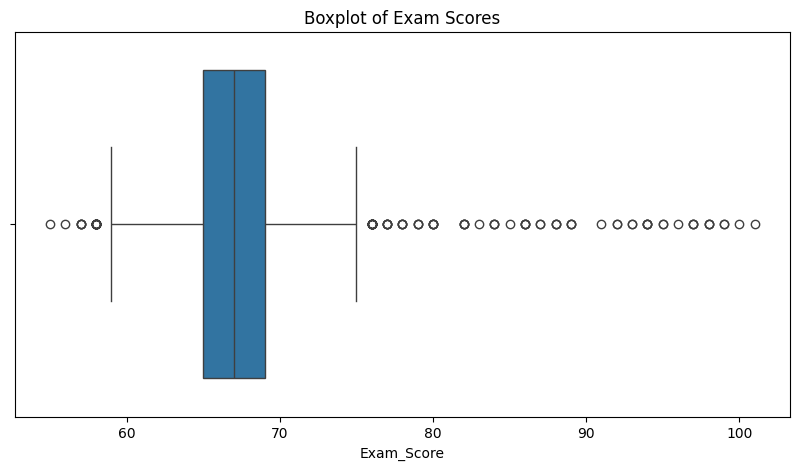

In [13]:
# Identify Outliers using the IQR method
Q1 = data['Exam_Score'].quantile(0.25)
Q3 = data['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Exam_Score'] < lower_bound) | (data['Exam_Score'] > upper_bound)]
print("Identified Outliers:")
print(outliers)

#  Visualize Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Exam_Score'])
plt.title('Boxplot of Exam Scores')
plt.show()

# Remove outliers
data_cleaned = data[~((data['Exam_Score'] < lower_bound) | (data['Exam_Score'] > upper_bound))]


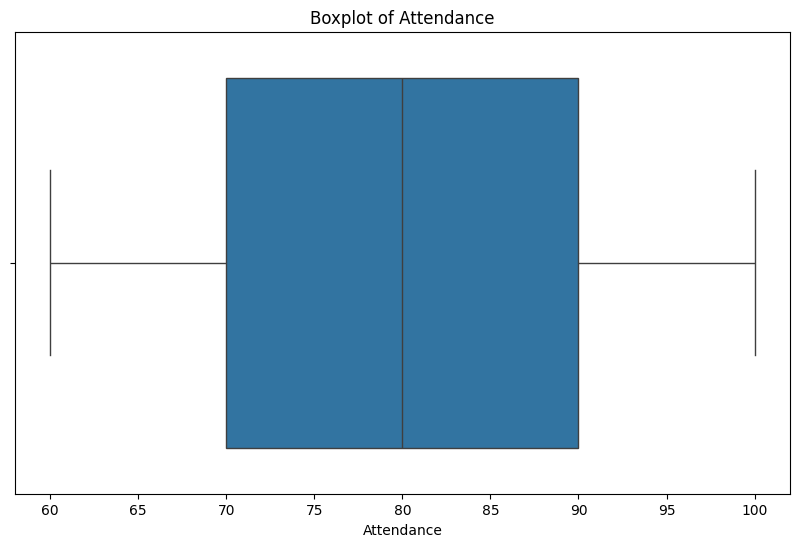

In [14]:
# Checking outliers in Attendance column

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Attendance'])
plt.title('Boxplot of Attendance')
plt.show()

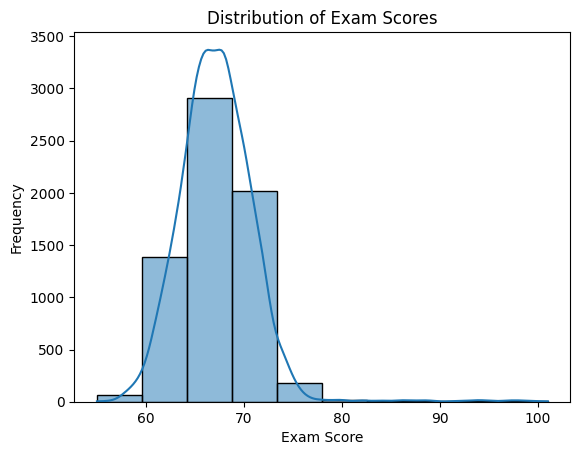

In [15]:
# Exploratory Data Analysis

# Visualize the distribution of exam scores

sns.histplot(data['Exam_Score'], bins=10, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.581072  
Sleep_Hours                -0.012216          -0.000378   -0.017022  
Previous_Scores            -0.013122          -0.011274    0.175079  
Tutoring_Sessions        

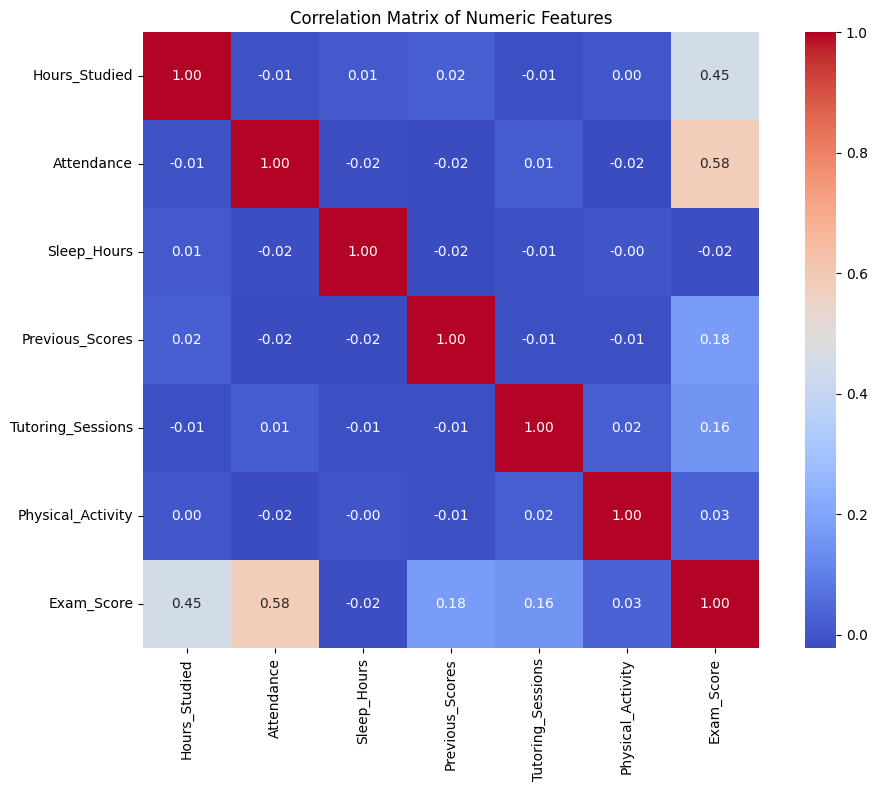

In [16]:
# Correlation matrix of numeric Features

# Select only numerical variables
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Display the correlation matrix
print(corr_matrix)

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 6607 and the vector passed to `x` has length 9.

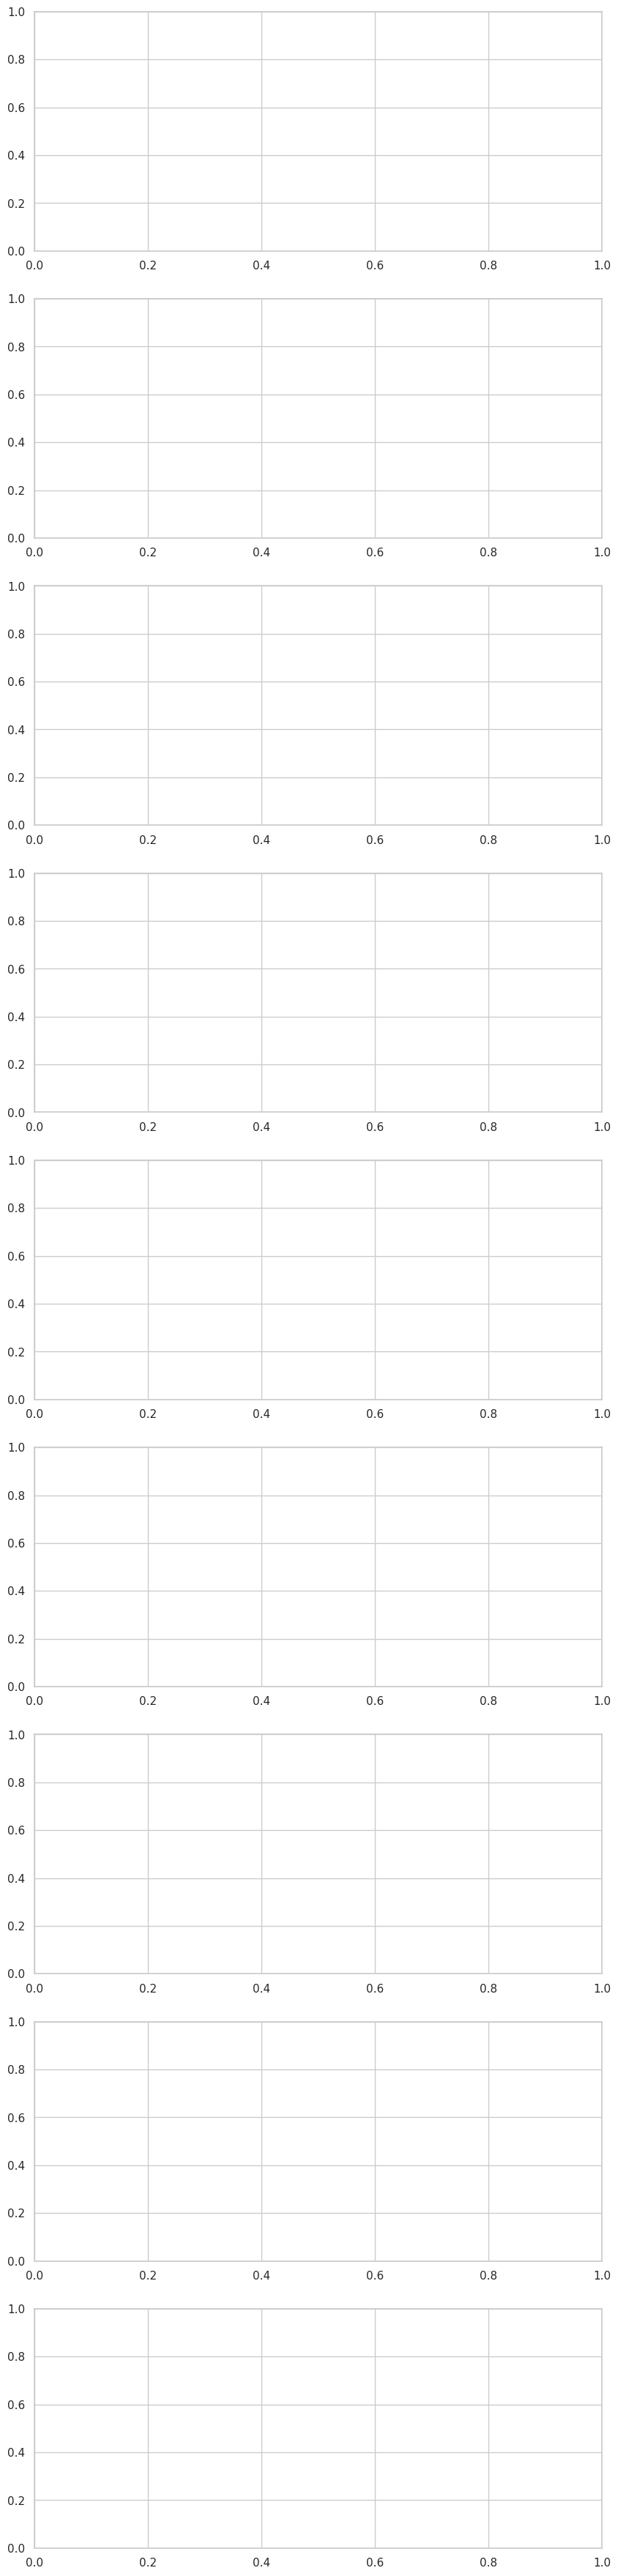

In [18]:
# Visualization techniques of Exam Score by the categorical variables

# Example categorical features you might want to visualize against Exam_Score
features = ['Parental_Involvment', 'Access_to_Resources','Extracurricular_Activities','Motivation_Level','Internet_Access','School_Type', 'Gender', 'Teacher_Quality', 'Family_income']

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(len(features), 1, figsize=(10, 5 * len(categorical_features)))

# Loop through each categorical feature to create plots
for ax, feature in zip(axes, categorical_features):
    sns.barplot(data=data, x=categorical_features, y='Exam_Score', ax=ax)
    ax.set_title(f'Exam Score by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Exam Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



In [3]:
# Survival rate by passenger class
sns.barplot(x='Physical_Activity', y='Exam_Score', data=data)
plt.title(' ')
plt.show()

NameError: name 'sns' is not defined